<a href="https://colab.research.google.com/github/OlehVakulchyk/DataScience/blob/main/HW_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Частина 1

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

# Згорткова нейронна мережа

In [40]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import plot_model, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras import regularizers

In [41]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

num_classes = 10
num_features = 28*28*1

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
x_train, x_test = x_train / 255., x_test / 255.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

display(x_train.shape)

(60000, 28, 28, 1)

In [42]:
learning_rate = 0.001
batch_size = 256
epochs = 100
activation='relu'
optimizer=Adam
regularizer=regularizers.l2(0.00001)
loss='categorical_crossentropy'

In [43]:
# Створення моделі
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.4),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
    Dense(10, activation='softmax')
    ])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                      

In [44]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")


Epoch 1/100
234/234 [==============================] - 10s 29ms/step - loss: 0.6040 - accuracy: 0.7886 - val_loss: 2.2304 - val_accuracy: 0.3369 - lr: 0.0010
Epoch 2/100
234/234 [==============================] - 7s 29ms/step - loss: 0.3584 - accuracy: 0.8761 - val_loss: 0.9850 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 3/100
234/234 [==============================] - 7s 28ms/step - loss: 0.3043 - accuracy: 0.8962 - val_loss: 0.2745 - val_accuracy: 0.9056 - lr: 0.0010
Epoch 4/100
234/234 [==============================] - 6s 27ms/step - loss: 0.2740 - accuracy: 0.9074 - val_loss: 0.2523 - val_accuracy: 0.9143 - lr: 0.0010
Epoch 5/100
234/234 [==============================] - 7s 28ms/step - loss: 0.2528 - accuracy: 0.9157 - val_loss: 0.2433 - val_accuracy: 0.9155 - lr: 0.0010
Epoch 6/100
234/234 [==============================] - 6s 28ms/step - loss: 0.2327 - accuracy: 0.9212 - val_loss: 0.2299 - val_accuracy: 0.9210 - lr: 0.0010
Epoch 7/100
234/234 [==============================] - 6s

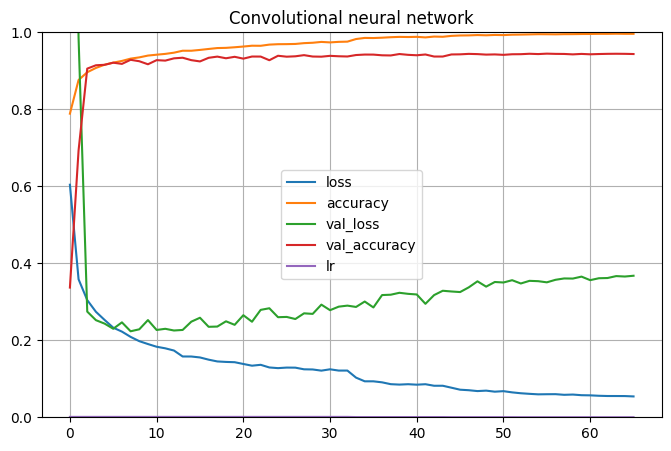

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Convolutional neural network")
plt.legend(loc='center')
plt.gca().set_ylim(0, 1)
plt.show()

In [64]:
model.save('Convolutional neural network')

# Висновок
Точність згорткової нейромережі виявилась - 0.9445.
Точність багатошарової мережі - 0.9101.
Порівнюючи точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Точність згорткової нейромережі виявилась більша на 4+ %.

# Частина 2
В цій частині ми знову будемо працювати з датасетом fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.

Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.

Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

# VGG16 без донавчання

In [54]:
learning_rate = 0.001
batch_size = 256
epochs = 100
activation='relu'
optimizer=Adam
regularizer=regularizers.l2(0.00001)
loss='categorical_crossentropy'

In [56]:
from keras.applications import VGG16

steps_per_epoch = len(x_train) // batch_size
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)
callbacks = [lr_scheduler, early_stopping]


base_model = VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))
base_model.trainable = False

x_train_vgg = np.repeat(x_train, 3, axis=3)
x_train_vgg = tf.image.resize(x_train_vgg, [48, 48])
x_test_vgg = np.repeat(x_test, 3, axis=3)
x_test_vgg = tf.image.resize(x_test_vgg, [48, 48])

model_vgg = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.4),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
    Dense(10, activation='softmax')
])

model_vgg.compile(optimizer=optimizer(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_vgg.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 512)               262656    
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 256)               131328    
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 128)              

In [59]:
history_vgg = model_vgg.fit(x_train_vgg, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(x_test_vgg, y_test),
                            callbacks=callbacks)

train_loss_vgg, train_acc_vgg = model_vgg.evaluate(x_train_vgg, y_train)
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(x_test_vgg, y_test)
print(f"\nVGG Train accuracy: {train_acc_vgg:.4f}")
print(f"VGG Test accuracy: {test_acc_vgg:.4f}")
print(f"Difference in accuracy with VGG: {(train_acc_vgg - test_acc_vgg)*100:.2f}%")

Epoch 1/100
235/235 [==============================] - 16s 68ms/step - loss: 0.3458 - accuracy: 0.8770 - val_loss: 0.3626 - val_accuracy: 0.8743 - lr: 0.0010
Epoch 2/100
235/235 [==============================] - 16s 67ms/step - loss: 0.3368 - accuracy: 0.8796 - val_loss: 0.3504 - val_accuracy: 0.8778 - lr: 0.0010
Epoch 3/100
235/235 [==============================] - 16s 68ms/step - loss: 0.3305 - accuracy: 0.8830 - val_loss: 0.3606 - val_accuracy: 0.8761 - lr: 0.0010
Epoch 4/100
235/235 [==============================] - 15s 65ms/step - loss: 0.3233 - accuracy: 0.8838 - val_loss: 0.3538 - val_accuracy: 0.8793 - lr: 0.0010
Epoch 5/100
235/235 [==============================] - 16s 68ms/step - loss: 0.3198 - accuracy: 0.8870 - val_loss: 0.3518 - val_accuracy: 0.8795 - lr: 0.0010
Epoch 6/100
235/235 [==============================] - 16s 67ms/step - loss: 0.3090 - accuracy: 0.8904 - val_loss: 0.3469 - val_accuracy: 0.8825 - lr: 0.0010
Epoch 7/100
235/235 [==============================]

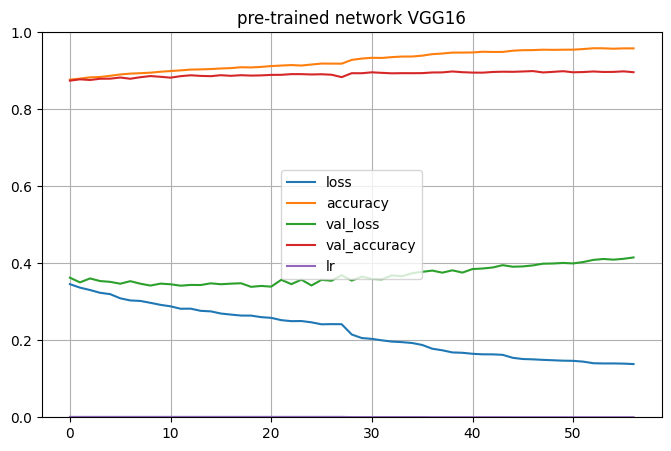

In [60]:
pd.DataFrame(history_vgg.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(loc='center')
plt.title("pre-trained network VGG16")
plt.show()

# VGG16 з виділенням ознак

In [7]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))
base_model.trainable = False

model_vgg_fs = Sequential([
   base_model,
   Flatten(),
   Dense(512, activation='relu'),
   Dropout(0.5),
   Dense(256, activation="relu"),
   Dropout(0.2),
   Dense(10, activation="softmax")
])

model_vgg_fs.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer(learning_rate=learning_rate),
    metrics=["accuracy"]
)

model_vgg_fs.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [9]:
history_vgg_fs = model_vgg_fs.fit(x_train_vgg, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(x_test_vgg, y_test),
                                  callbacks=callbacks)

train_loss_vgg_ft, train_acc_vgg_ft = model_vgg_fs.evaluate(x_train_vgg, y_train)
test_loss_vgg_ft, test_acc_vgg_ft = model_vgg_fs.evaluate(x_test_vgg, y_test)
print(f"\nFine-tuned VGG Train accuracy: {train_acc_vgg_ft:.4f}")
print(f"Fine-tuned VGG Test accuracy: {test_acc_vgg_ft:.4f}")
print(f"Difference in accuracy with VGG: {(train_acc_vgg_ft - test_acc_vgg_ft)*100:.2f}%")


Epoch 1/100
235/235 [==============================] - 22s 68ms/step - loss: 0.6517 - accuracy: 0.7676 - val_loss: 0.4277 - val_accuracy: 0.8431 - lr: 0.0010
Epoch 2/100
235/235 [==============================] - 16s 66ms/step - loss: 0.4388 - accuracy: 0.8403 - val_loss: 0.4002 - val_accuracy: 0.8526 - lr: 0.0010
Epoch 3/100
235/235 [==============================] - 15s 64ms/step - loss: 0.3951 - accuracy: 0.8552 - val_loss: 0.3685 - val_accuracy: 0.8658 - lr: 0.0010
Epoch 4/100
235/235 [==============================] - 15s 64ms/step - loss: 0.3716 - accuracy: 0.8640 - val_loss: 0.3563 - val_accuracy: 0.8701 - lr: 0.0010
Epoch 5/100
235/235 [==============================] - 15s 65ms/step - loss: 0.3584 - accuracy: 0.8681 - val_loss: 0.3504 - val_accuracy: 0.8726 - lr: 0.0010
Epoch 6/100
235/235 [==============================] - 16s 68ms/step - loss: 0.3424 - accuracy: 0.8737 - val_loss: 0.3502 - val_accuracy: 0.8739 - lr: 0.0010
Epoch 7/100
235/235 [==============================]

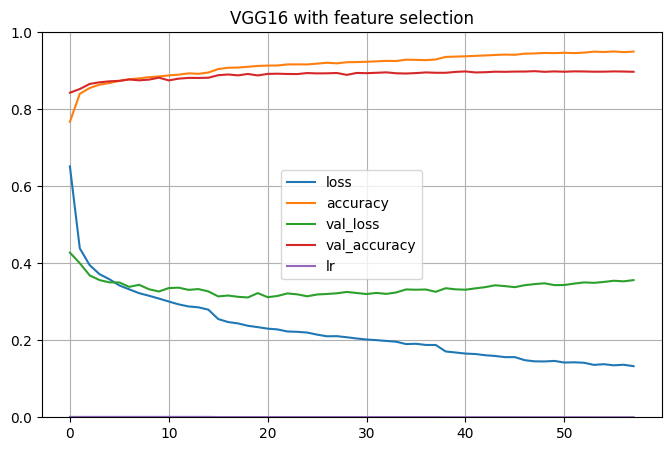

In [23]:
pd.DataFrame(history_vgg_fs.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(loc='center')
plt.title("VGG16 with feature selection")
plt.show()

In [63]:
model_vgg_fs.save('VGG16 with feature selection')

# VGG16 з донавчанням

In [26]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

# Розморожуємо декілька верхніх шарів
for layer in base_model.layers[:-5]:
    layer.trainable = False


model_vgg_ft = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_vgg_ft.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

model_vgg_ft.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                5130      
                                                                 
Total params: 14982474 (57.15 MB)
Trainable params: 7347210 (28.03 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [27]:
history_vgg_ft = model_vgg_ft.fit(x_train_vgg, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(x_test_vgg, y_test),
                                  callbacks=callbacks)

train_loss_vgg_ft, train_acc_vgg_ft = model_vgg_ft.evaluate(x_train_vgg, y_train)
test_loss_vgg_ft, test_acc_vgg_ft = model_vgg_ft.evaluate(x_test_vgg, y_test)
print(f"\nFine-tuned VGG Train accuracy: {train_acc_vgg_ft:.4f}")
print(f"Fine-tuned VGG Test accuracy: {test_acc_vgg_ft:.4f}")
print(f"Difference in accuracy with VGG: {(train_acc_vgg_ft - test_acc_vgg_ft)*100:.2f}%")

Epoch 1/100
235/235 [==============================] - 22s 79ms/step - loss: 0.4580 - accuracy: 0.8388 - val_loss: 0.2979 - val_accuracy: 0.8949 - lr: 0.0010
Epoch 2/100
235/235 [==============================] - 19s 79ms/step - loss: 0.2620 - accuracy: 0.9073 - val_loss: 0.2540 - val_accuracy: 0.9106 - lr: 0.0010
Epoch 3/100
235/235 [==============================] - 19s 80ms/step - loss: 0.2265 - accuracy: 0.9190 - val_loss: 0.2740 - val_accuracy: 0.9055 - lr: 0.0010
Epoch 4/100
235/235 [==============================] - 19s 79ms/step - loss: 0.1950 - accuracy: 0.9297 - val_loss: 0.2540 - val_accuracy: 0.9066 - lr: 0.0010
Epoch 5/100
235/235 [==============================] - 18s 78ms/step - loss: 0.1821 - accuracy: 0.9323 - val_loss: 0.2470 - val_accuracy: 0.9192 - lr: 0.0010
Epoch 6/100
235/235 [==============================] - 18s 78ms/step - loss: 0.1642 - accuracy: 0.9399 - val_loss: 0.2419 - val_accuracy: 0.9176 - lr: 0.0010
Epoch 7/100
235/235 [==============================]

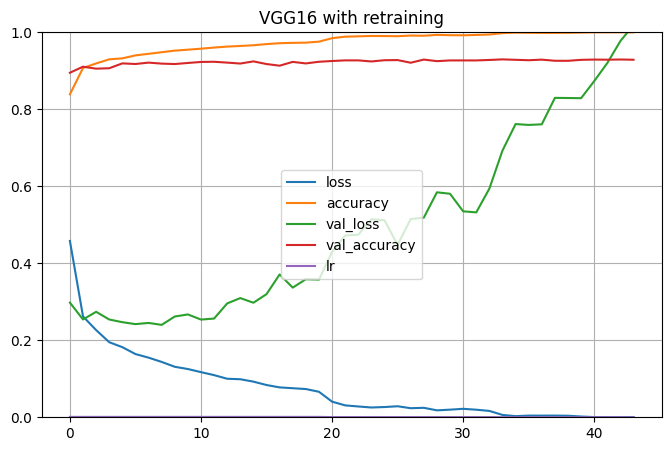

In [61]:
pd.DataFrame(history_vgg_ft.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("VGG16 with retraining")
plt.legend(loc='center')
plt.gca().set_ylim(0, 1)
plt.show()

In [62]:
model_vgg_ft.save('VGG16 with retraining')

# Висновки
Щодо згорткових мереж з використанням VGG16 - то за рахунок того, що дані з параметру "imagenet" досить відрізняються від даних з датасету fashion_mnist, тому і навчання не було таким ефективним (88,92% в порівнянні зі звичайною згортковою мережею 94,45%)

Train accuracy: 1.0000
Test accuracy: 0.9445
Difference accuracy: 5.55%

VGG Train accuracy: 0.9737
VGG Test accuracy: 0.8992
Difference in accuracy with VGG: 7.45%

Fine-tuned VGG_fs Train accuracy: 0.9657
Fine-tuned VGG_fs Test accuracy: 0.8990
Difference in accuracy with VGG: 6.67%

Fine-tuned VGG_ft Train accuracy: 0.9991
Fine-tuned VGG__ft Test accuracy: 0.9296
Difference in accuracy with VGG: 6.95%

Остання модель, незважаючи на досить пристойний відсоток "влучань", все ж таки не є прийнятною дивлячись на графік крос-ентропії.